In [59]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

def train_model_SVM(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    # model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    model = SVC(kernel='rbf')
    # model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_LR(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    # model = SVC(kernel='rbf')
    model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    # model = SVC(kernel='rbf')
    model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

In [62]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
X,y = getXY(csv.copy(), features=head)
model, acc, cross = train_model_LR(X,y,do_print=False)
print(acc, cross.mean(), cross.std())

weight = model.coef_.copy()
rank = (abs(weight) * -1).argsort()

X_ori.shape=(720, 133) y_ori.shape=(720,)
1.0 0.9805555555555555 0.015466012118972297


In [110]:
rank[:,:15][0]

array([ 7, 20, 32, 26, 25,  9, 56, 36, 14, 11,  6, 10, 18,  3, 15])

========== 1 ==========
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.5847222222222223 0.5847222222222223 0.013102751572300852
LR: 0.5291666666666667 0.5375 0.0215613537448056


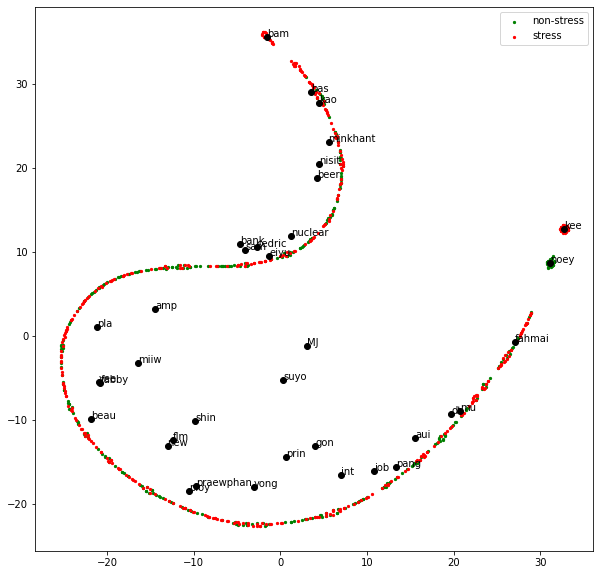

========== 2 ==========
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.7430555555555556 0.7333333333333333 0.027638539919628332
LR: 0.5277777777777778 0.5208333333333333 0.052796049468745034


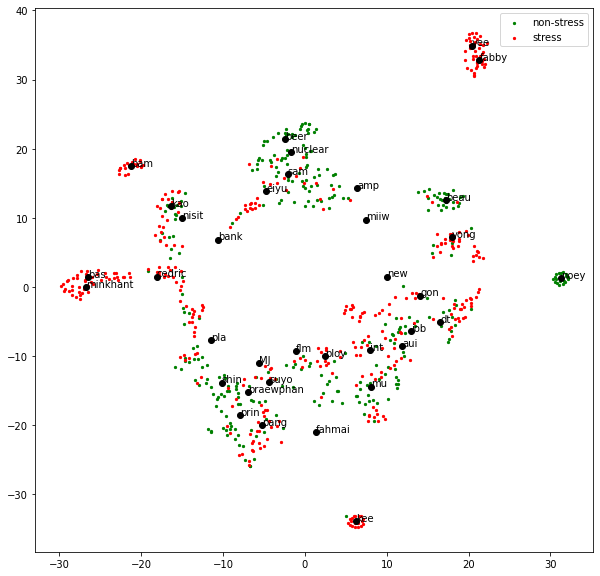

========== 3 ==========
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.7916666666666666 0.7763888888888889 0.06225259675281936
LR: 0.5375 0.5333333333333334 0.04356774205932812


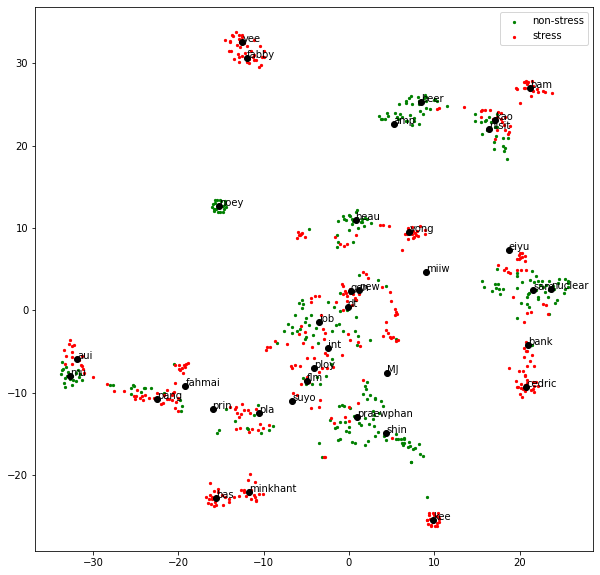

========== 4 ==========
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.825 0.8027777777777778 0.049222347629637085
LR: 0.4930555555555556 0.48611111111111105 0.04073021749615328


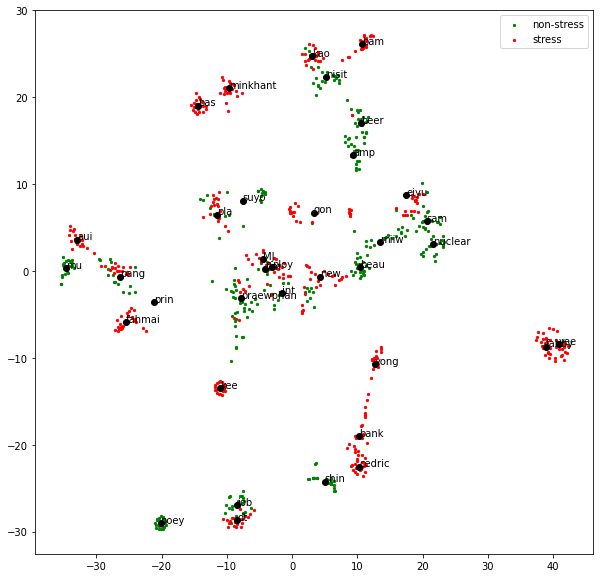

========== 5 ==========
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.8791666666666667 0.861111111111111 0.03977172517576765
LR: 0.5291666666666667 0.5277777777777779 0.036746545987008196


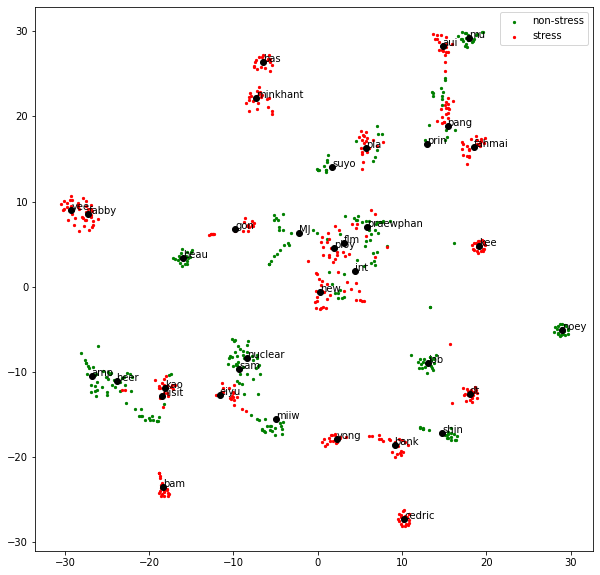

========== 6 ==========
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.9069444444444444 0.8875000000000002 0.04947642536265799
LR: 0.55 0.5430555555555556 0.03851506839961679


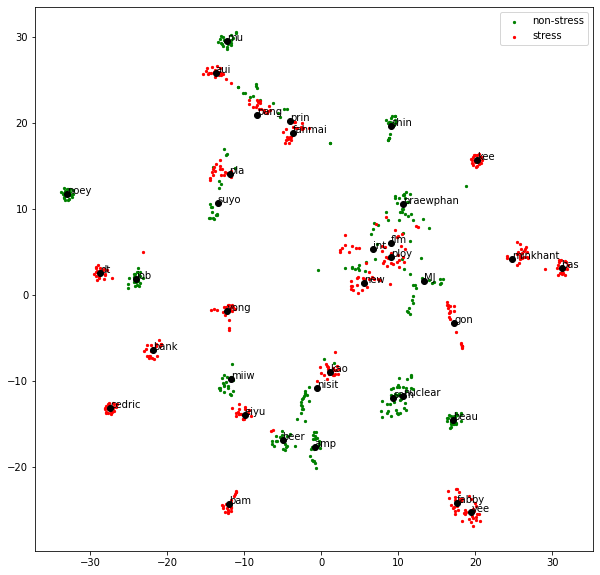

========== 7 ==========
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.9125 0.8958333333333334 0.0408484476940354
LR: 0.5805555555555556 0.5611111111111111 0.05091750772173156


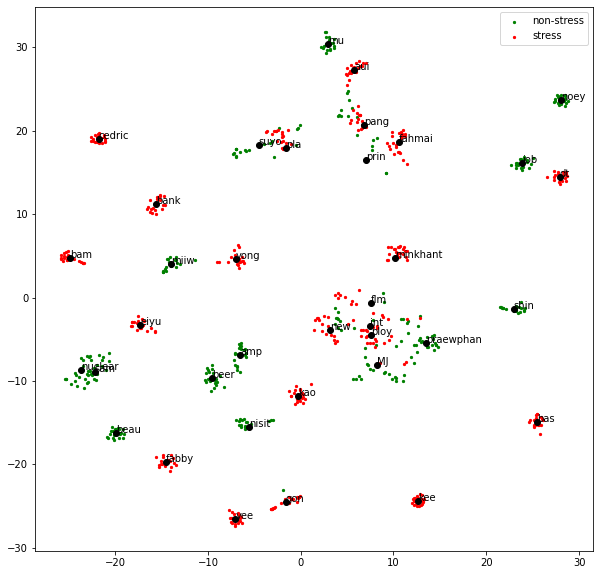

========== 8 ==========
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.9847222222222223 0.9694444444444444 0.016197088596792506
LR: 0.7611111111111111 0.7513888888888889 0.04947642536265797


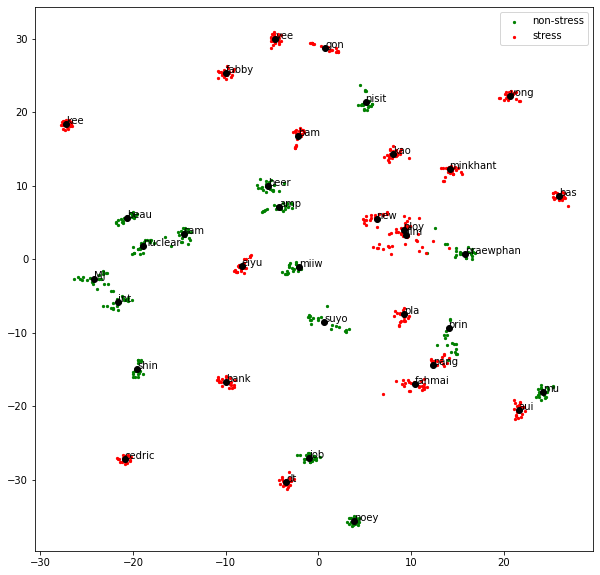

========== 9 ==========
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.9861111111111112 0.9722222222222221 0.013888888888888905
LR: 0.7777777777777778 0.7555555555555555 0.047790695928014576


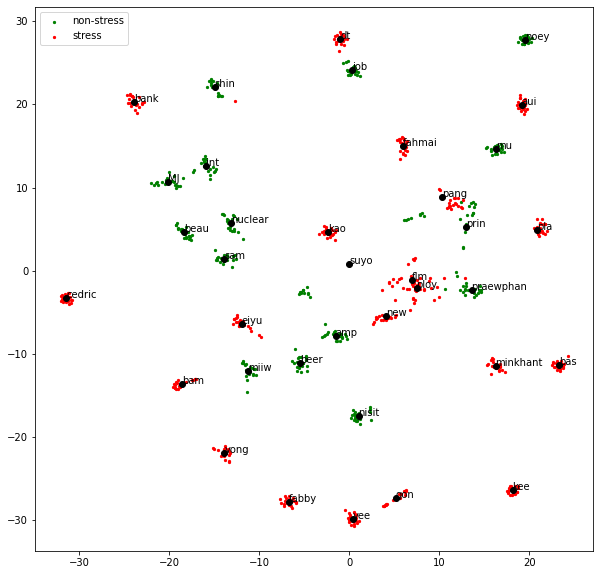

========== 10 ==========
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.9847222222222223 0.976388888888889 0.01527777777777777
LR: 0.7763888888888889 0.7694444444444445 0.03888888888888888


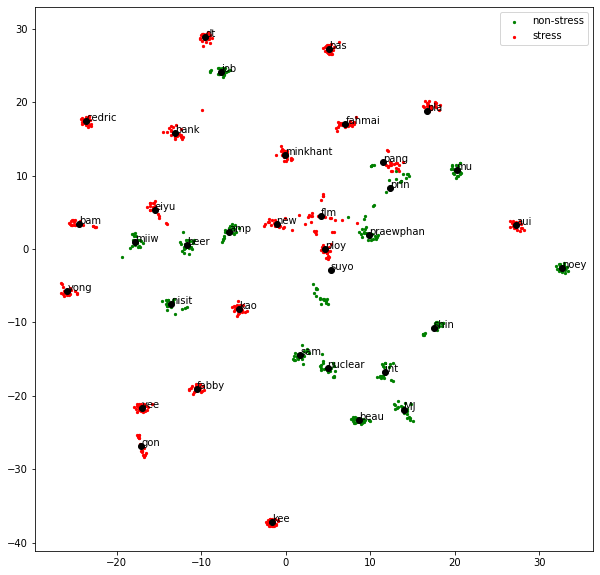

========== 11 ==========
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.9861111111111112 0.9666666666666668 0.027216552697590882
LR: 0.7986111111111112 0.7861111111111111 0.025000000000000012


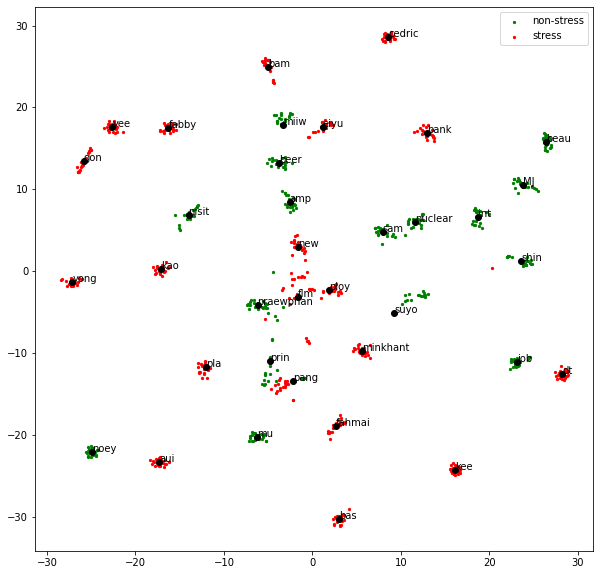

========== 12 ==========
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.9833333333333333 0.9777777777777779 0.018839805508681303
LR: 0.7680555555555556 0.75 0.027074428735580462


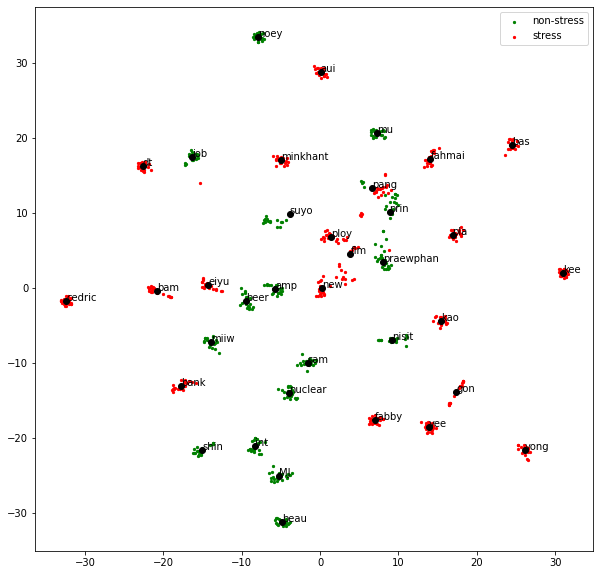

========== 13 ==========
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.9902777777777778 0.9722222222222221 0.016433554953054496
LR: 0.7708333333333334 0.7541666666666667 0.05416666666666666


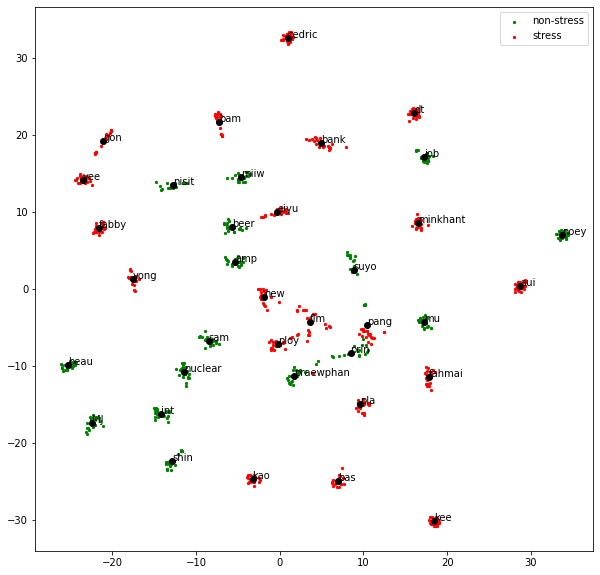

========== 14 ==========
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.9861111111111112 0.975 0.021336515966301695
LR: 0.7819444444444444 0.7749999999999999 0.044704102609530796


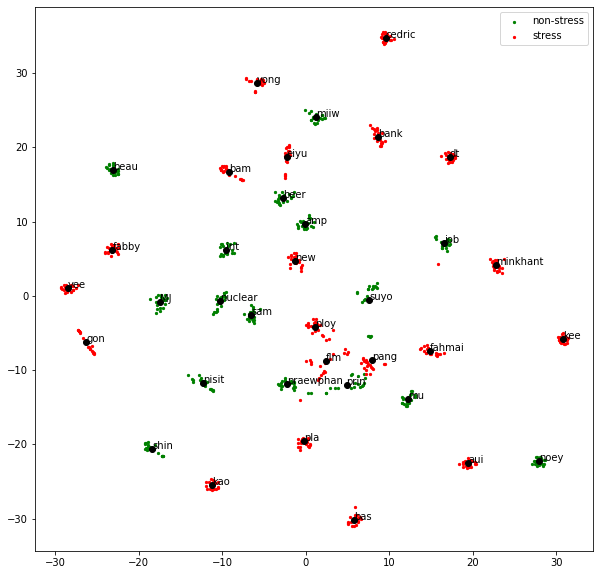

In [109]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)

for i in range(1,15):
    print("="*10,i,"="*10)
    X,y = getXY(csv.copy(), features=head[:i])
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:", acc, cross.mean(), cross.std())

    model, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",acc, cross.mean(), cross.std())

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(figsize = (10,10))
    cdict = {0: 'green', 1: 'red'}
    ldict = {0: 'non-stress', 1: 'stress'}
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c =cdict[g], label = ldict[g], s = 5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax.scatter(point[0],point[1], c='black')
        ax.text(point[0],point[1], s=name)
    ax.legend()
    plt.show()
    

# Use LR RANK

========== 1 ==========
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.725 0.711111111111111 0.04639803635691683
LR: 0.7152777777777778 0.7138888888888888 0.05733268733486193


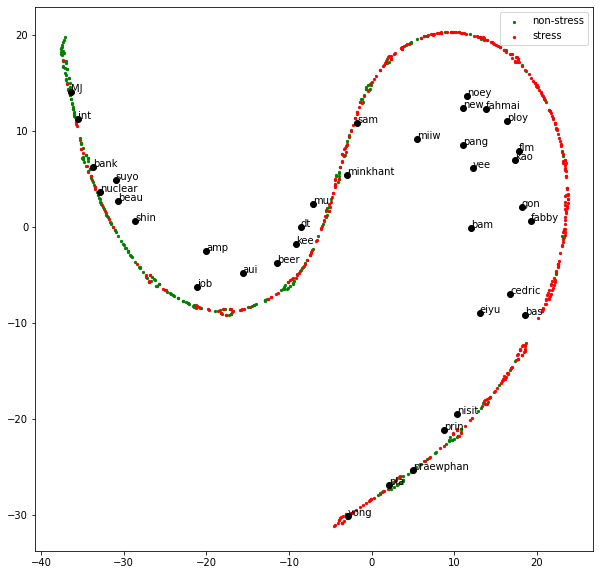

========== 2 ==========
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.7902777777777777 0.7777777777777778 0.03167153958608716
LR: 0.7361111111111112 0.7347222222222222 0.047891499026574066


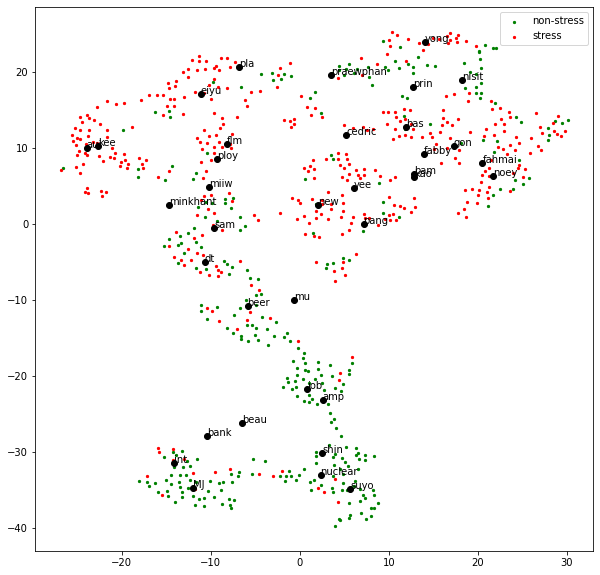

========== 3 ==========
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.825 0.8125 0.03182344232608223
LR: 0.7736111111111111 0.7666666666666666 0.04427049291808119


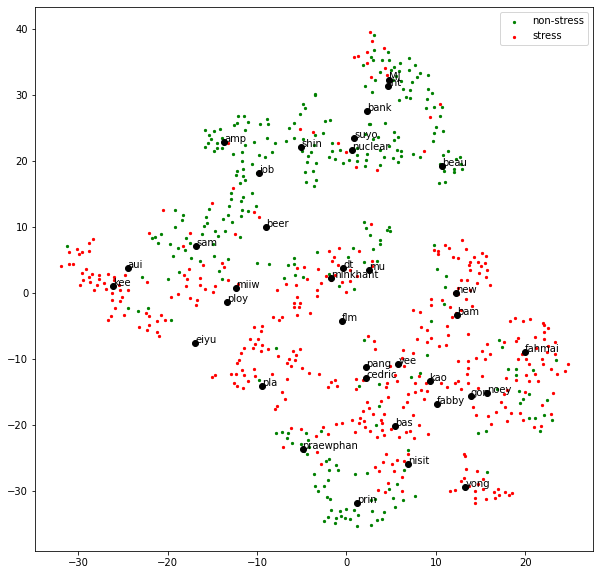

========== 4 ==========
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.8680555555555556 0.851388888888889 0.03624441208527746
LR: 0.7847222222222222 0.7833333333333333 0.0426730319326034


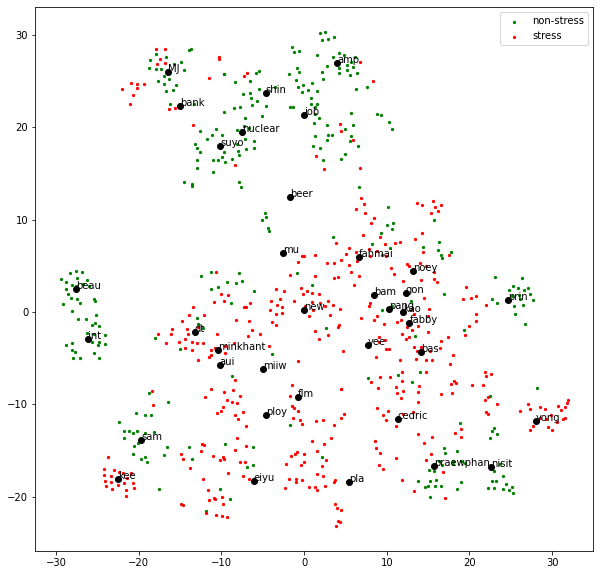

========== 5 ==========
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.8805555555555555 0.8555555555555555 0.044008276438207934
LR: 0.7986111111111112 0.7944444444444444 0.05443310539518176


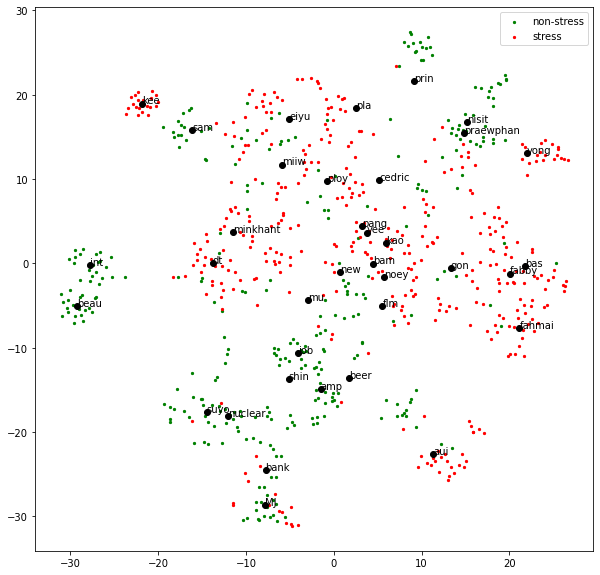

========== 6 ==========
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.9041666666666667 0.888888888888889 0.03928371006591929
LR: 0.8083333333333333 0.8013888888888889 0.03570822258939566


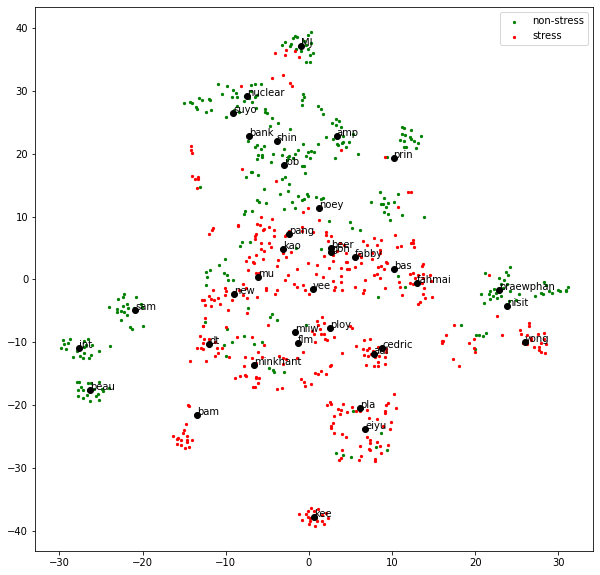

========== 7 ==========
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.9194444444444444 0.9027777777777779 0.03568120160740315
LR: 0.8402777777777778 0.836111111111111 0.0376796110173626


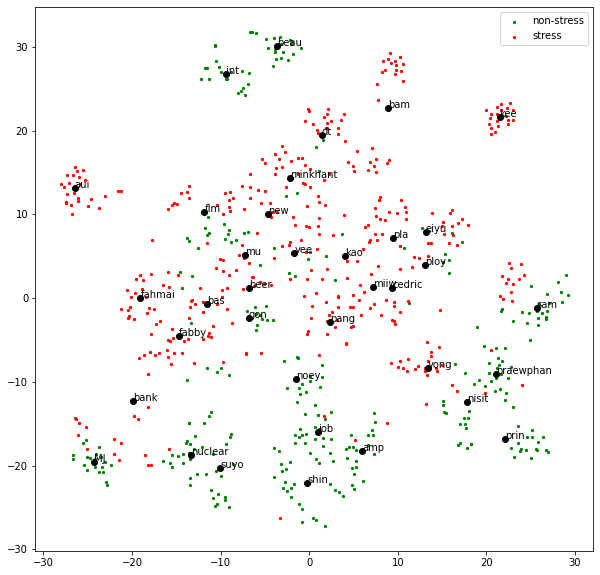

========== 8 ==========
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.9347222222222222 0.9097222222222223 0.035816102661743426
LR: 0.8527777777777777 0.8555555555555555 0.0457279934254287


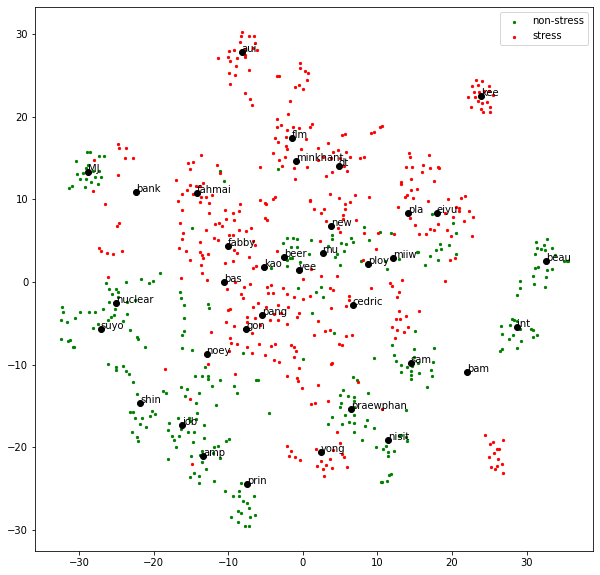

========== 9 ==========
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.9416666666666667 0.9222222222222223 0.015466012118972276
LR: 0.875 0.8722222222222221 0.0350264450358847


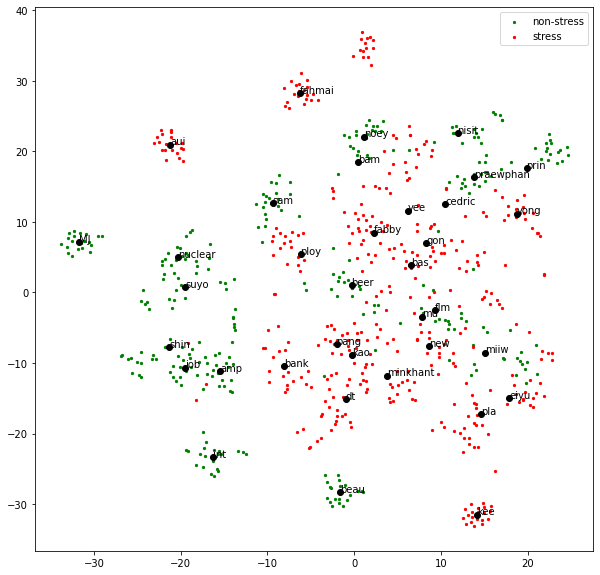

========== 10 ==========
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.95 0.9208333333333334 0.03624441208527748
LR: 0.8736111111111111 0.8708333333333333 0.055224709311308455


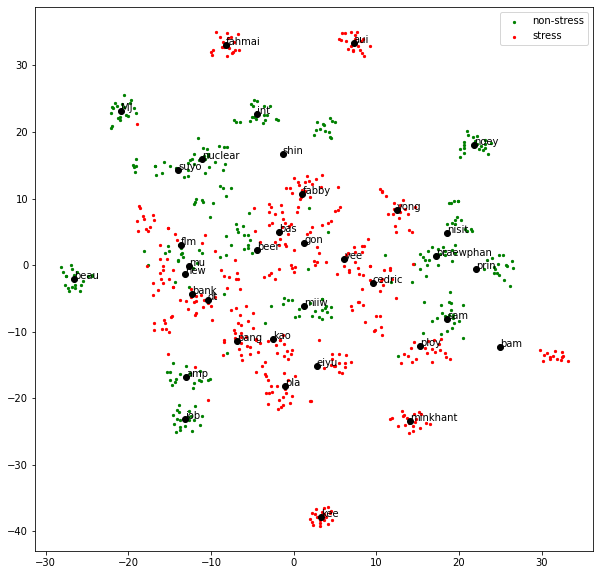

========== 11 ==========
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.9666666666666667 0.95 0.023405971592156582
LR: 0.8833333333333333 0.8805555555555555 0.031180478223116183


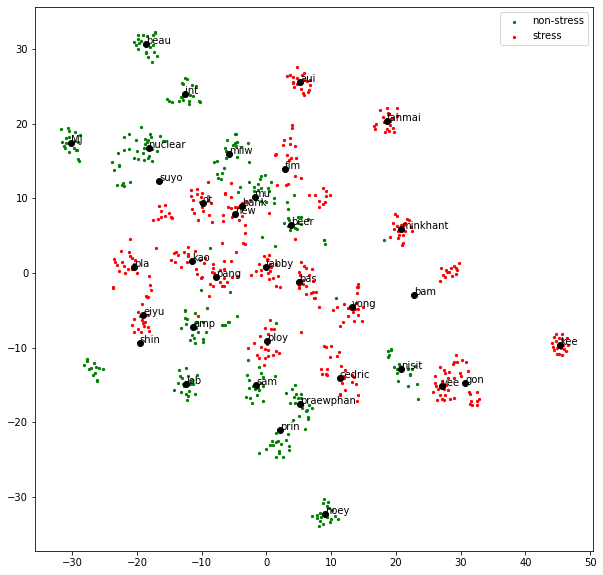

========== 12 ==========
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.9847222222222223 0.9624999999999998 0.010847568994314796
LR: 0.8875 0.8833333333333334 0.02721655269759087


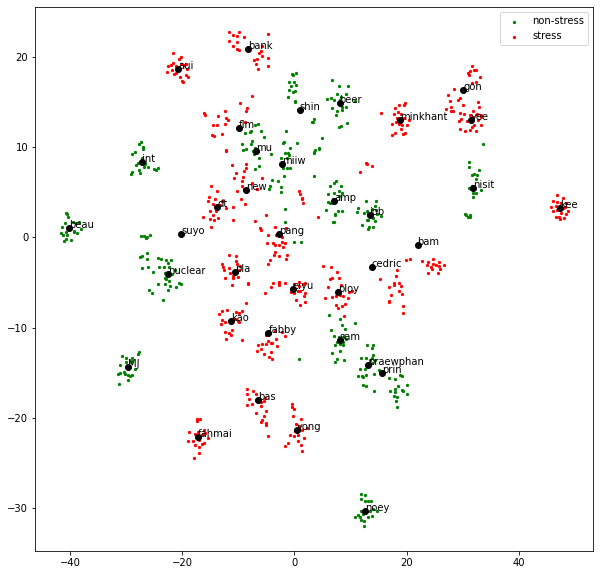

========== 13 ==========
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.9805555555555555 0.9625000000000001 0.016492141787552667
LR: 0.9097222222222222 0.9 0.0468119431843131


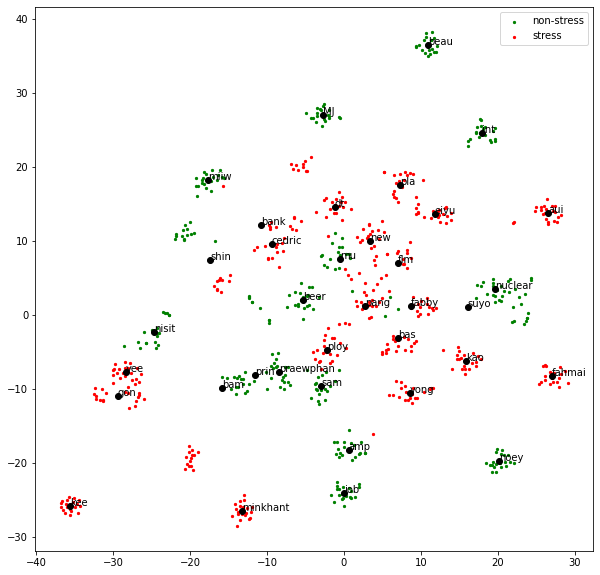

========== 14 ==========
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.9875 0.9694444444444444 0.014958791130929178
LR: 0.9125 0.9027777777777779 0.027074428735580462


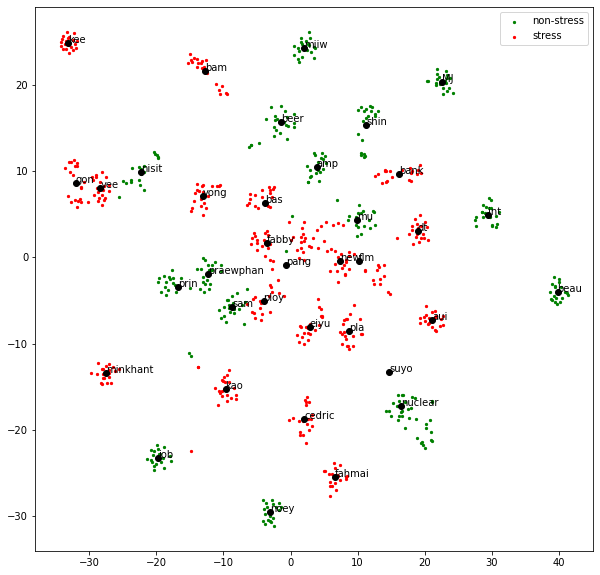

In [111]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)
rank = [ 7, 20, 32, 26, 25,  9, 56, 36, 14, 11,  6, 10, 18,  3, 15]
for i in range(1,15):
    print("="*10,i,"="*10)
    X,y = getXY(csv.copy(), features=head[rank[:i]])
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:", acc, cross.mean(), cross.std())

    model, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",acc, cross.mean(), cross.std())

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(figsize = (10,10))
    cdict = {0: 'green', 1: 'red'}
    ldict = {0: 'non-stress', 1: 'stress'}
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c =cdict[g], label = ldict[g], s = 5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax.scatter(point[0],point[1], c='black')
        ax.text(point[0],point[1], s=name)
    ax.legend()
    plt.show()
    